In [2]:
import numpy as np
import matplotlib.pyplot as plt   
from scipy import stats
import os
import random
from skbio.diversity.alpha import *

In [3]:
def go_edge(tseries):
    nregions=tseries.shape[1]
    Blen=tseries.shape[0]
    nedges=int(nregions**2/2-nregions/2)
    iTriup= np.triu_indices(nregions,k=1) 
    gz=stats.zscore(tseries,nan_policy='omit')
    Eseries = gz[:,iTriup[0]]*gz[:,iTriup[1]]
    return Eseries

In [4]:
path='/home/etienne/data/target_dir/'

In [5]:
G = np.arange(0.3,0.98,0.01)
N= np.arange(0.005,0.055,0.005)

In [6]:
G=np.array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62,
       0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73,
       0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84,
       0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95,
       0.96, 0.97])
N=np.array([0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045,
       0.05 ])

In [7]:
Blen=1500
nregions=148

In [8]:
B=np.zeros((len(G),len(N),Blen,nregions))
for iig, ig in enumerate(G):
    for ii, i in enumerate(N):
        #print('mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')
        bold=np.load(path+'mpr_mouse_A148_G' +str(ig)+'_nsigma' +str(i)+'_alpha0.0.npz')['Bold_data'][-Blen:,0,:]
        if True not in np.unique(np.isnan(bold)):
            B[iig,ii,:,:]=bold
        else:
            B[iig,ii,:,:]=np.random.rand(Blen,nregions)

In [9]:
#bad example
Bbad=B[24,1,:,:]
#nice example
Bnice=B[31,9,:,:]


In [10]:
Bnice[:,100]=np.random.rand(1500)

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Bad',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(Bbad[:,i])+3*i)
plt.subplot(212)
plt.title('Nice',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(Bnice[:,i],nan_policy='omit')+3*i)
plt.tight_layout()
plt.show()

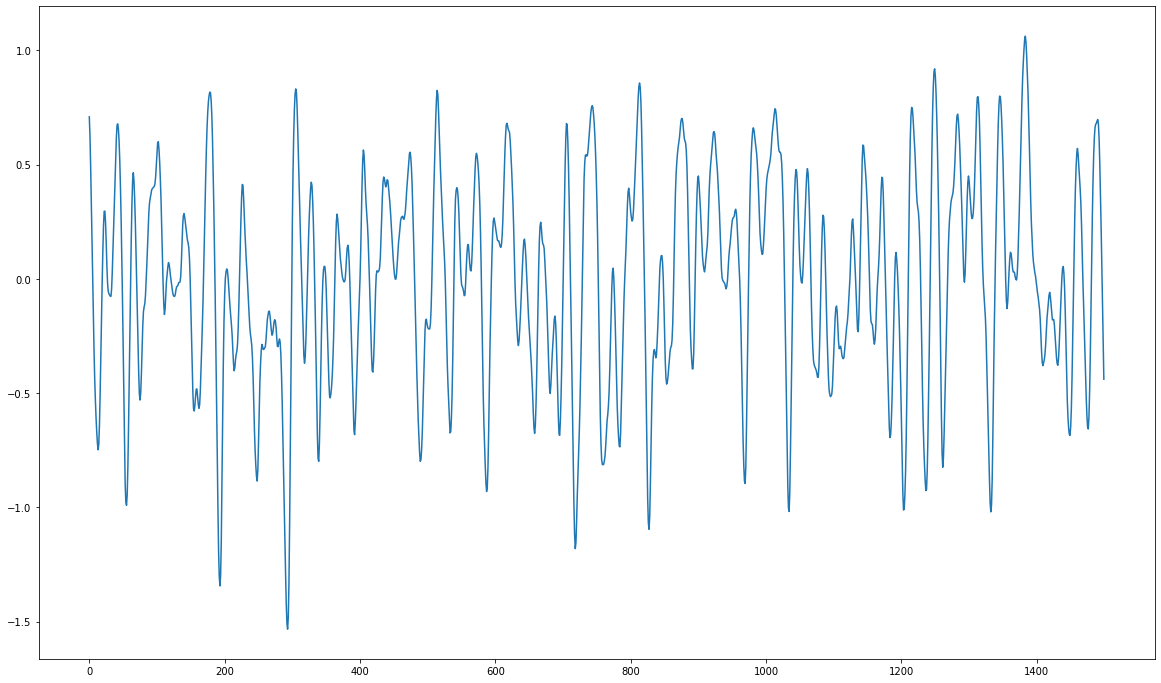

In [12]:
plt.figure(figsize=(20,12))
plt.plot(Bnice[:1500,0]-np.mean(Bnice[:,0]))

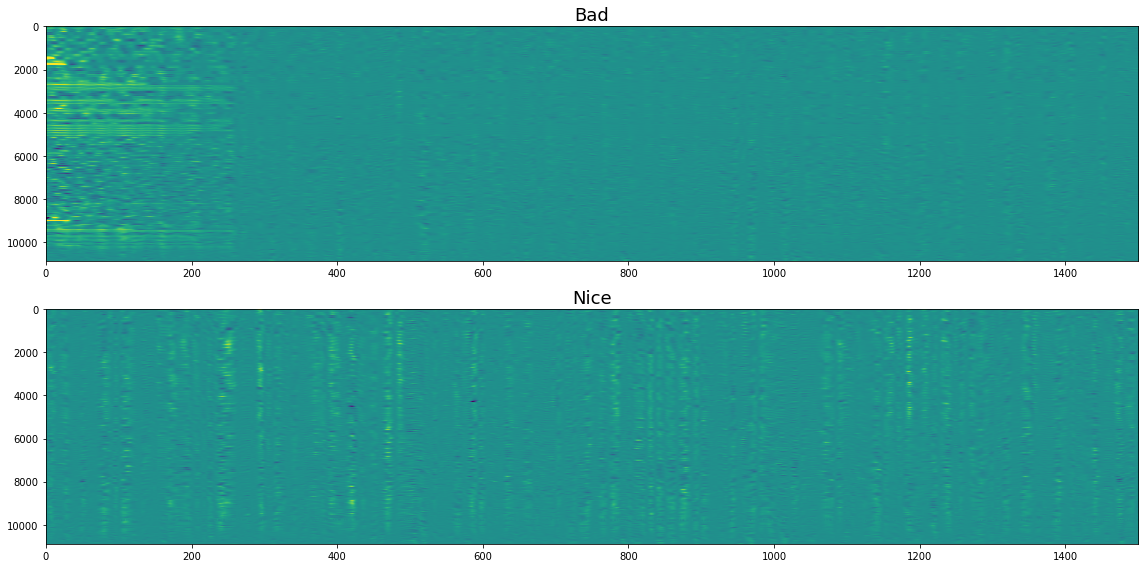

In [13]:
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Bad',fontsize=18)
plt.imshow(go_edge(Bbad).T,vmin=-5.,vmax=5.,aspect='auto')
plt.subplot(212)
plt.title('Nice',fontsize=18)
plt.imshow(go_edge(Bnice).T,vmin=-5.,vmax=5.,aspect='auto')
plt.tight_layout()
plt.show()

In [14]:
plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('Bad',fontsize=18)
plt.imshow(np.corrcoef(go_edge(Bbad[300:,:])),vmax=0.2,cmap='plasma')
plt.colorbar()
plt.subplot(122)
plt.title('Nice',fontsize=18)
plt.imshow(np.corrcoef(go_edge(Bnice)),vmax=0.2,cmap='plasma')
plt.colorbar()
plt.tight_layout()
plt.show()

In [1]:
plt.figure(figsize=(14,6))
plt.suptitle('FC')
plt.subplot(121)
plt.title('Bad',fontsize=18)
plt.imshow(np.corrcoef(Bbad.T))
plt.colorbar()
plt.subplot(122)
plt.title('Nice',fontsize=18)
plt.imshow(np.corrcoef(Bnice.T))
plt.colorbar()
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [16]:
def reg_measure(Bold_sim,n=1):
    V=np.var(Bold_sim,axis=0)
    S=np.sum(V[np.argsort(V)[-n::]])
    return(S)

def triangle_measure(Bold_sim):
    C=np.corrcoef(go_edge(Bold_sim))
    T=C[np.triu_indices(C.shape[0],k=1)]
    var=np.var(T)
    return(var)

def simpsonbis(Bold_sim):
    C=(np.corrcoef(go_edge(Bold_sim)))
    T=C[np.triu_indices(C.shape[0],k=1)]
    if np.isnan(T).any():
        return(0)
    I=np.unique(np.around(T,decimals=2),return_counts=True)
    return(simpson(I[1]))

In [17]:
def measures(Bold_sim):
    V=np.var(Bold_sim,axis=0)
    S=np.sum(V[np.argsort(V)[-20::]])
    C=(np.corrcoef(go_edge(Bold_sim)))
    T=C[np.triu_indices(C.shape[0],k=1)]
    if np.isnan(T).any():
        return(0)
    var=np.var(T)
    I=np.unique(np.around(T,decimals=2),return_counts=True)
    return(S,var,simpson(I[1]))

def measure_min(Bold,n=100,w=300):
    l=Bold.shape[0]
    m=int((l-w)/n)+1
    M=np.zeros((3,m))
    for k in range(m):
        ones = np.ones(l,dtype=bool)
        ones[k*n:w+k*n]=False
        M[:,k]=measures(Bold[ones,:])
    return(M[:,np.argmin(M[1,:])])

In [18]:
def edges_str(Bold):
    return(np.sqrt(np.sum(go_edge(Bold)**2,axis=1)))

def edges_var(Bold):
    a=edges_str(Bold)
    return(np.sum(np.abs(a[1:]-a[:1499])))

def burstiness_parameter(Bold):
    a=edges_str(Bold)
    sig=np.std(a)
    mu=np.mean(a)
    return((sig-mu)/(sig+mu))

6536.872743228303
-0.6552748366363105


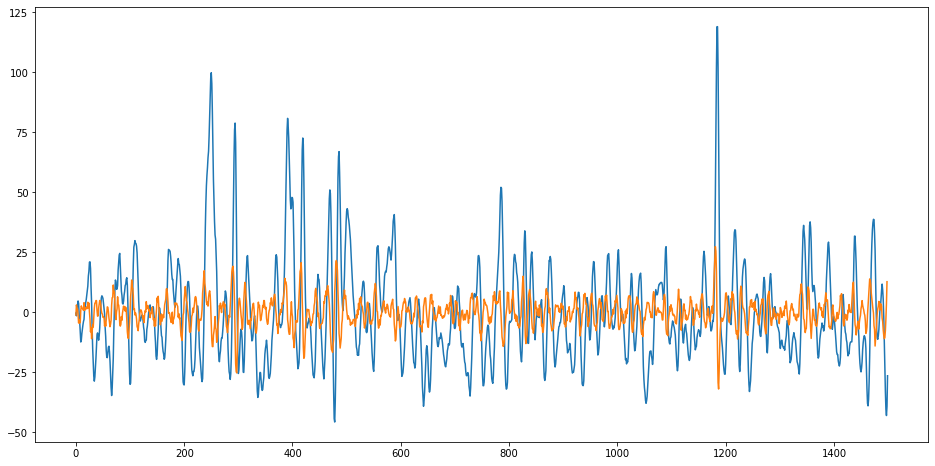

In [19]:
plt.figure(figsize=(16,8))
test=edges_str(Bnice)
plt.plot(test-np.mean(test))
plt.plot((test[1:]-test[:1499]))
print(edges_var(Bnice))
print(burstiness_parameter(Bnice))

3640.6985384639565
-0.3232220165984487


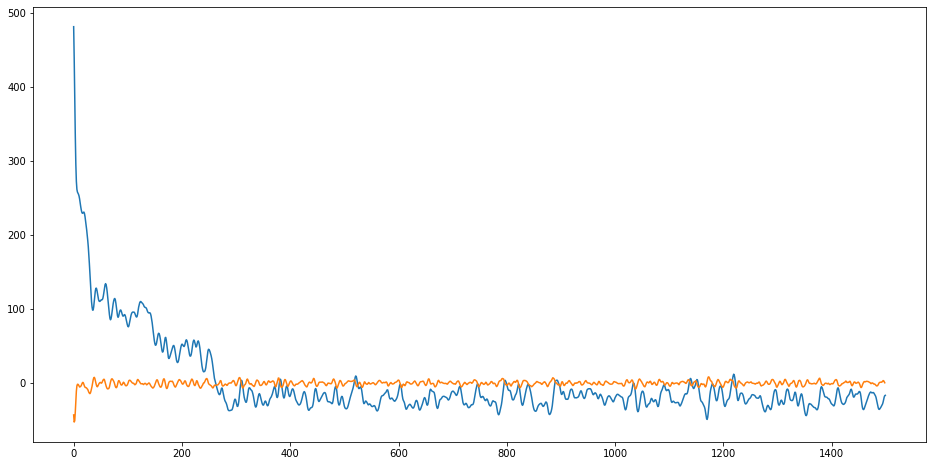

In [20]:
plt.figure(figsize=(16,8))
test=edges_str(Bbad)
plt.plot(test-np.mean(test))
plt.plot((test[1:]-test[:1499]))
print(edges_var(Bbad))
print(burstiness_parameter(Bbad))

In [21]:
MEASURER=np.zeros((len(G),len(N)))
MEASURET=np.zeros((len(G),len(N)))
MEASURES=np.zeros((len(G),len(N)))
couple=np.zeros((len(G),len(N),2))
MEASUREG=np.zeros((len(G),len(N)))
MEASUREB=np.zeros((len(G),len(N)))

for ii, i in enumerate(G):
    for jj, j in enumerate(N):
        MEASURER[ii,jj]=reg_measure(B[ii,jj,:,:])
        MEASUREG[ii,jj]=edges_var(B[ii,jj,:,:])
        MEASURET[ii,jj]=triangle_measure(B[ii,jj,:,:])
        couple[ii,jj]=[i,j]
        MEASURES[ii,jj]=simpsonbis(B[ii,jj,:,:])
        MEASUREB[ii,jj]=burstiness_parameter(B[ii,jj,:,:])
cou=couple.reshape((680,-1,2))[:,0,:]

In [27]:
to_save=np.array([MEASURER,MEASURET,MEASURES,MEASUREG,MEASUREB,couple[:,:,0],couple[:,:,1]])
np.save('measure_stim',to_save)

In [26]:
to_save.shape

(7, 68, 10)

In [32]:
mT=MEASURET.flatten()
mR=MEASURER.flatten()
mG=MEASUREG.flatten()
mB=MEASUREB.flatten()
mS=MEASURES.flatten()
MG=stats.zscore(mG[np.isnan(mG)==False])
MT=stats.zscore(mT[np.isnan(mT)==False])
MS=stats.zscore(mS[np.isnan(mT)==False])
MB=mB[np.isnan(mB)==False]
MR=mR[np.isnan(mB)==False]
coup=cou[np.isnan(mB)==False,:]

[[0.59  0.04 ]
 [0.6   0.035]
 [0.6   0.04 ]
 [0.61  0.035]
 [0.69  0.005]
 [0.7   0.005]
 [0.71  0.005]]


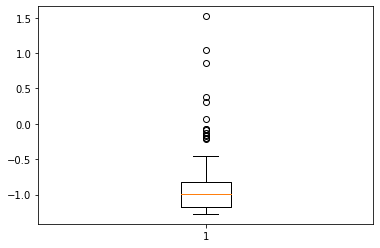

In [251]:
ths=np.percentile(MR,75)
coupb=coup[MR<ths]
MBIS=MB[MR<ths]+MT[MR<ths]
plt.boxplot(MBIS)
q=np.percentile(MBIS,98)
print(coupb[MBIS>q])

In [146]:
annotations = coup

plt.figure(figsize=(20,20))
plt.scatter(MB,MG)
plt.xlabel('Burstiness parameter')
plt.ylabel('Variance de la plus haute r√©gion')
for i, label in enumerate(annotations):
    plt.annotate(label, (MB[i], MG[i]))
plt.show()

In [33]:
ths=1.5
annotations = coup[(mR<ths)]
testG=MG[(mR<ths)]
val=testG
q=np.percentile(val,99)
print(annotations[val>q])

IndexError: boolean index did not match indexed array along dimension 0; dimension is 448 but corresponding boolean dimension is 680

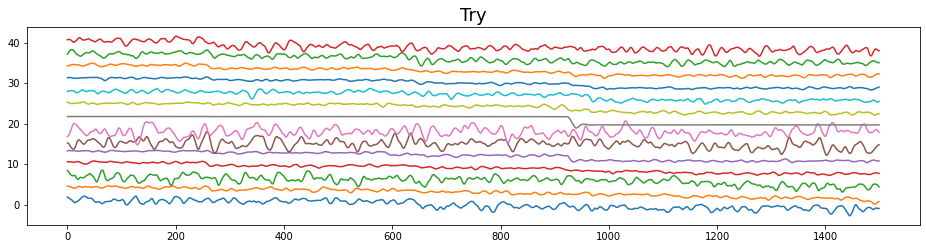

In [114]:
Btry=B[25,0,:,:]
plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Try',fontsize=18)
for i in range(14):
    plt.plot(stats.zscore(Btry[:,i])+3*i)

plt.figure(figsize=(16,8))
plt.subplot(211)
plt.title('Try',fontsize=18)
plt.imshow(go_edge(Btry).T,vmin=-5.,vmax=5.,aspect='auto')

plt.figure(figsize=(14,6))
plt.suptitle('dFC_e')
plt.subplot(121)
plt.title('Try',fontsize=18)
plt.imshow(np.corrcoef(go_edge(Btry)),cmap='plasma')
plt.colorbar()

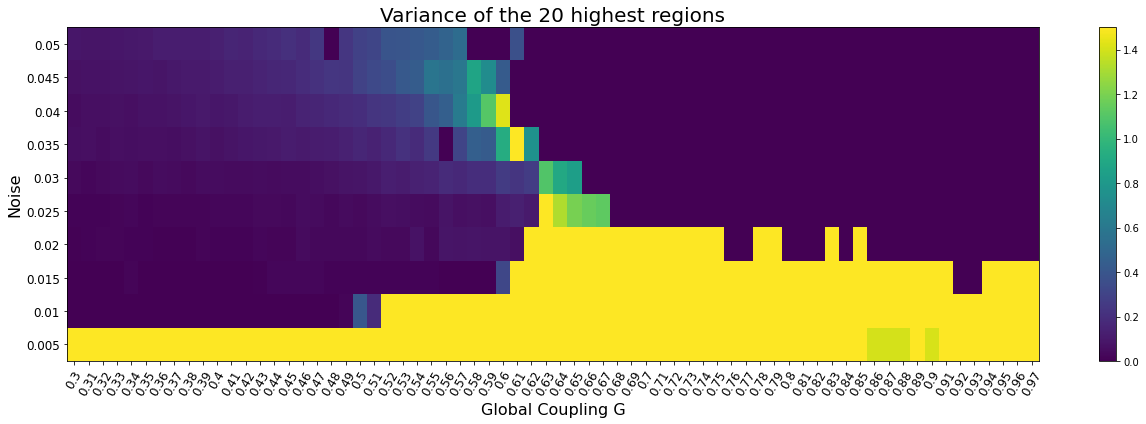

In [34]:
plt.figure(figsize=(18,6))
mx=np.max(np.abs(MEASURER))
plt.imshow(MEASURER[:,::-1].T,aspect='auto',interpolation='nearest',cmap='viridis',vmax=ths,vmin=0);
plt.xticks(np.arange(len(G)),np.around(G,3),rotation=60,fontsize=12);
plt.yticks(np.arange(len(N)),np.around(N,3)[::-1],fontsize=12);plt.title('Variance of the 20 highest regions', fontsize=20);
plt.colorbar();plt.xlabel('Global Coupling G',fontsize=16);plt.ylabel('Noise',fontsize=16);
plt.tight_layout()
plt.show()

In [235]:
A=np.array([1,2,3,4,5,6,7,8,9,10])
B=A.reshape(5,-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

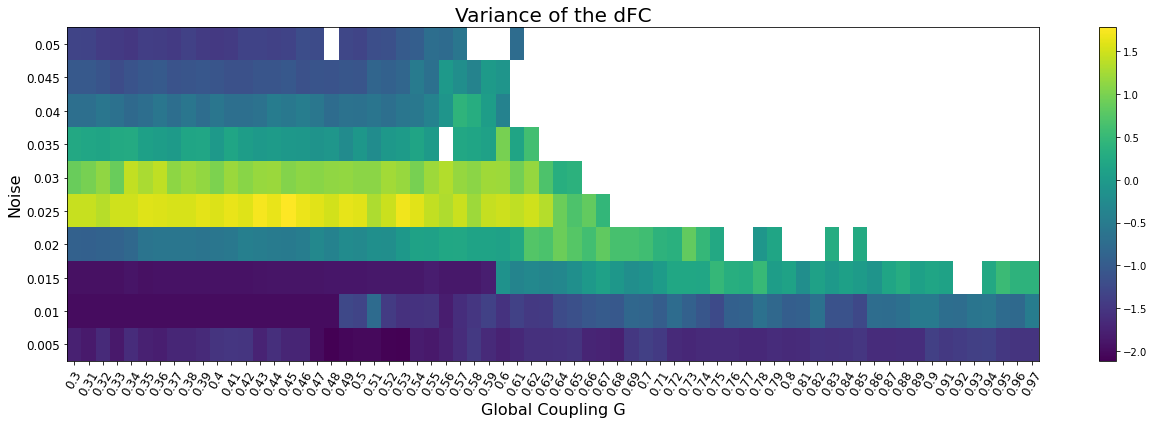

In [232]:
plt.figure(figsize=(18,6))
to_plot=(mB+stats.zscore(mG,nan_policy='omit')).reshape(68,-1)
plt.imshow(to_plot[:,::-1].T,aspect='auto',interpolation='nearest',cmap='viridis');
plt.xticks(np.arange(len(G)),np.around(G,3),rotation=60,fontsize=12);
plt.yticks(np.arange(len(N)),np.around(N,3)[::-1],fontsize=12);plt.title('Variance of the dFC', fontsize=20);
plt.colorbar();plt.xlabel('Global Coupling G',fontsize=16);plt.ylabel('Noise',fontsize=16);
plt.tight_layout()
plt.show()

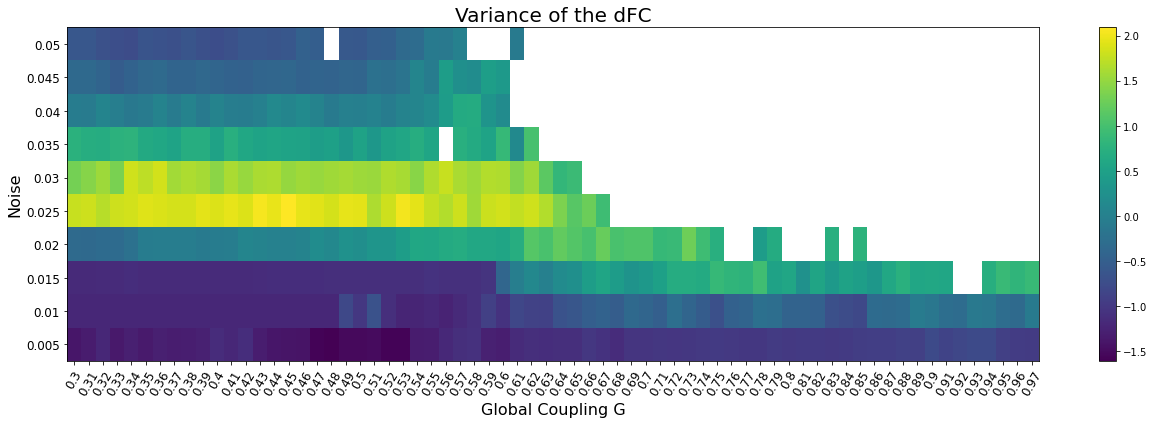

In [30]:
plt.figure(figsize=(18,6))
to_plot=stats.zscore(mG,nan_policy='omit').reshape(68,-1)
plt.imshow(to_plot[:,::-1].T,aspect='auto',interpolation='nearest',cmap='viridis');
plt.xticks(np.arange(len(G)),np.around(G,3),rotation=60,fontsize=12);
plt.yticks(np.arange(len(N)),np.around(N,3)[::-1],fontsize=12);plt.title('Variance of the dFC', fontsize=20);
plt.colorbar();plt.xlabel('Global Coupling G',fontsize=16);plt.ylabel('Noise',fontsize=16);
plt.tight_layout()
plt.show()